In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from mne import EvokedArray
from mne.datasets import fetch_fsaverage
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel
from scipy.stats.distributions import chi2
from statsmodels.stats.anova import AnovaRM, anova_lm
from statsmodels.stats.multitest import multipletests
from vr2f.decoding import plotters
from vr2f.staticinfo import COLORS, PATHS, TIMINGS
from vr2f.utils.stats import l2norm

In [3]:
# Setup:
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
matplotlib.rcParams.update({"font.size": 16})
cm = 1 / 2.54

# Parameters:
alpha_lvl = 0.05
p_val_cbp = 0.05

paths = PATHS()
path_in = Path(
    paths.DATA_ET_DECOD, "mono", "neutral_vs_happy_vs_angry_vs_surprised", "roc_auc_ovr", "scores"
)

sub_list_str = [s.split("-scores")[0] for s in os.listdir(path_in)]
sub_list_str = np.unique(sorted(sub_list_str))

In [4]:
data_dict_allemos = plotters.load_decod_res_per_viewcond(
    sub_list_str=sub_list_str,
    conditions=["neutral", "happy", "angry", "surprised"],
    vc_list=["", "mono", "stereo"],
    scoring="roc_auc_ovr",
)
data_dict_allemos["all"] = data_dict_allemos.pop("")

Found 1 significant clusters for viewing condition 'mono'.
Significant cluster: 124.000 - 1000.000


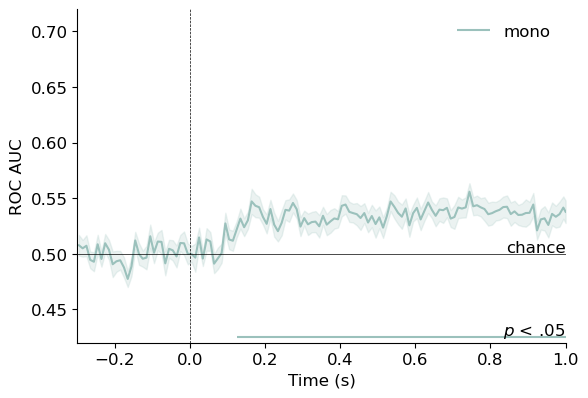

In [ ]:
fig, ax = plt.subplots(1, figsize=(16 * cm, 11 * cm))
plotters.prep_and_plot_from_data(data_dict_allemos,
                        subsets=["stereo"],
                        ax=ax,
                        chancelvl=0.5,
                        ylims=(0.42, 0.72))
